In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('online_retail.csv')

data.head()
# print(data.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
print(data.isnull().sum())
data = data.dropna()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
print(data.isnull().sum())
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data.shape

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


(397884, 8)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35


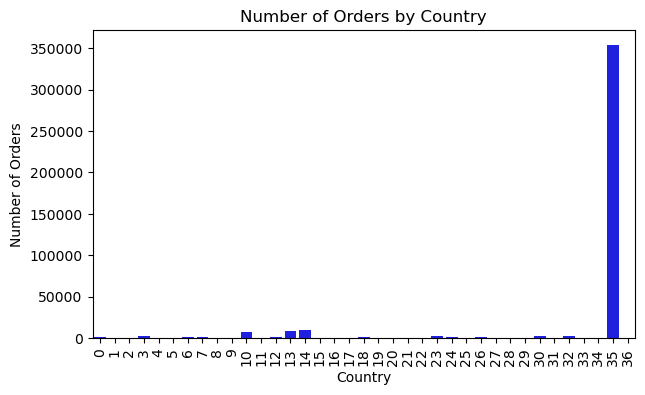

In [7]:
# Data Exploration and Visualization
# Tasks:
# Perform exploratory data analysis (EDA) to identify trends and patterns.
# Visualize data using libraries like Matplotlib and Seaborn.
# Deliverables:
# Jupyter Notebook with EDA and visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = data['Country'].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=country_counts.index, y=country_counts.values, color='blue')
plt.xticks(rotation=90)
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.show()

                                              Quantity
StockCode Description                                 
23843     PAPER CRAFT , LITTLE BIRDIE            80995
23166     MEDIUM CERAMIC TOP STORAGE JAR         77916
84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
85099B    JUMBO BAG RED RETROSPOT                46181
85123A    WHITE HANGING HEART T-LIGHT HOLDER     36725
84879     ASSORTED COLOUR BIRD ORNAMENT          35362
21212     PACK OF 72 RETROSPOT CAKE CASES        33693
22197     POPCORN HOLDER                         30931
23084     RABBIT NIGHT LIGHT                     27202
22492     MINI PAINT SET VINTAGE                 26076


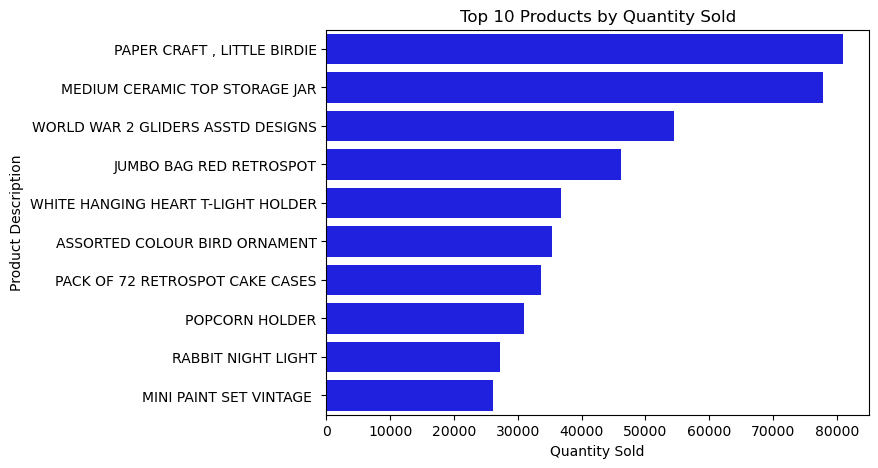

In [8]:
# Top Products by Quantity Sold
TopProducts= data.pivot_table(
    index=['StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(
    by='Quantity', ascending=False)

print(TopProducts.head(10))

TopProducts = TopProducts.head(10)

plt.figure(figsize=(7, 5))

sns.barplot(y='Description', x='Quantity', data=TopProducts, color='blue')

plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')

plt.show()

                                              CustomerID
StockCode Description                                   
22423     REGENCY CAKESTAND 3 TIER                   881
85123A    WHITE HANGING HEART T-LIGHT HOLDER         856
47566     PARTY BUNTING                              708
84879     ASSORTED COLOUR BIRD ORNAMENT              678
22720     SET OF 3 CAKE TINS PANTRY DESIGN           640
21212     PACK OF 72 RETROSPOT CAKE CASES            635
85099B    JUMBO BAG RED RETROSPOT                    635
22086     PAPER CHAIN KIT 50'S CHRISTMAS             613
22457     NATURAL SLATE HEART CHALKBOARD             587
22138     BAKING SET 9 PIECE RETROSPOT               581


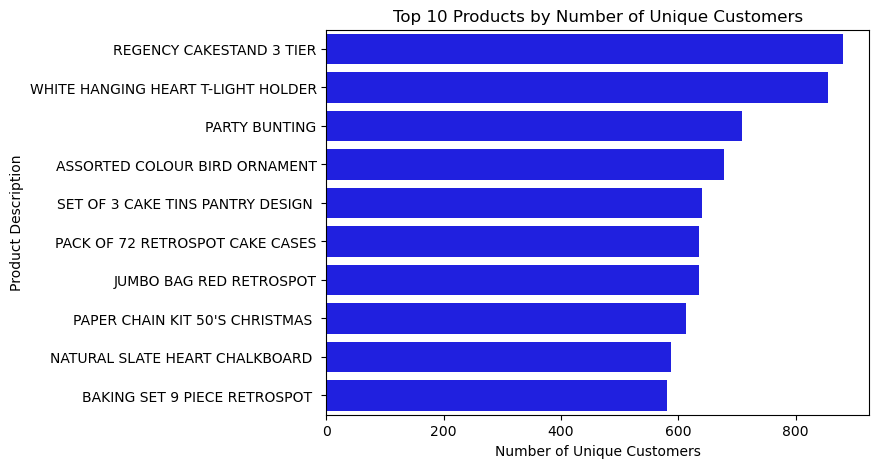

In [9]:
# Top Products by Number of Customers
CustomersBoughts = data.pivot_table(index=['StockCode','Description'],
                                values='CustomerID',
                                aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)
print(CustomersBoughts.head(10))

TopCustomersBoughts = CustomersBoughts.head(10)

plt.figure(figsize=(7, 5))

sns.barplot(y='Description', x='CustomerID', data=TopCustomersBoughts, color='blue')

plt.title('Top 10 Products by Number of Unique Customers')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Product Description')
plt.show()

In [10]:
# Feature Selection and Dimensionality Reduction
# Tasks:
# Select important features using techniques like Recursive Feature Elimination (RFE).
# Apply PCA (Principal Component Analysis) for dimensionality reduction.
# Deliverables:
# Python scripts demonstrating feature selection and PCA application.

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = data[['Quantity', 'UnitPrice', 'Country']]
y = (data['Quantity'] > data['Quantity'].mean()).astype(int) 

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Применение RFE для выбора признаков
rfe = RFE(estimator=model, n_features_to_select=2)  # Оставляем два наиболее важных признака
fit = rfe.fit(X, y)

print("Feature Rankings (lower is better):")
for i in range(X.shape[1]):
    print(f"Feature: {X.columns[i]}, Rank: {fit.ranking_[i]}")

selected_features = X.columns[fit.support_]
print("\nSelected Features:", selected_features)
X_selected = X[selected_features]



Feature Rankings (lower is better):
Feature: Quantity, Rank: 1
Feature: UnitPrice, Rank: 1
Feature: Country, Rank: 2

Selected Features: Index(['Quantity', 'UnitPrice'], dtype='object')


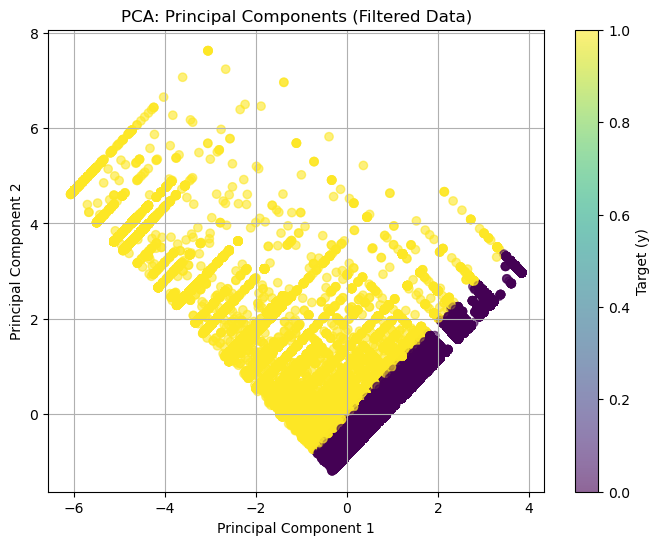

In [11]:
quantity_threshold = np.percentile(data['Quantity'], 99)
unitprice_threshold = np.percentile(data['UnitPrice'], 99)

filtered_data = data[(data['Quantity'] <= quantity_threshold) & (data['UnitPrice'] <= unitprice_threshold)]
X_filtered = filtered_data[['Quantity', 'UnitPrice']]
y_filtered = (filtered_data['Quantity'] > filtered_data['Quantity'].mean()).astype(int)

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c=y_filtered, cmap='viridis')
plt.colorbar(label='Target (y)')
plt.title('PCA: Principal Components (Filtered Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [12]:
# Classification Techniques
# Tasks:
# Implement basic classification algorithms such as Logistic Regression and Decision Trees.
# Deliverables:
# Code demonstrating classification model training and evaluation.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data[['Quantity', 'UnitPrice', 'Country']]  # Признаки
y = (data['Quantity'] > data['Quantity'].mean()).astype(int)  # Бинарная метка

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 1.0
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99799
           1       1.00      1.00      1.00     19567

    accuracy                           1.00    119366
   macro avg       1.00      1.00      1.00    119366
weighted avg       1.00      1.00      1.00    119366



In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))




Decision Tree Accuracy: 1.0
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99799
           1       1.00      1.00      1.00     19567

    accuracy                           1.00    119366
   macro avg       1.00      1.00      1.00    119366
weighted avg       1.00      1.00      1.00    119366



In [14]:
# Advanced Classification Methods
# Tasks:
# Explore advanced classifiers like Random Forest and Support Vector Machines (SVM).
# Deliverables:
# Code implementing and evaluating advanced classification models.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

rf_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())


Random Forest Accuracy: 1.0
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99799
           1       1.00      1.00      1.00     19567

    accuracy                           1.00    119366
   macro avg       1.00      1.00      1.00    119366
weighted avg       1.00      1.00      1.00    119366

Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean Accuracy: 1.0


In [15]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

svm_scores = cross_val_score(svm_clf, X, y, cv=5)
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())



SVM Accuracy: 1.0
SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99799
           1       1.00      1.00      1.00     19567

    accuracy                           1.00    119366
   macro avg       1.00      1.00      1.00    119366
weighted avg       1.00      1.00      1.00    119366

SVM Cross-Validation Scores: [1. 1. 1. 1. 1.]
SVM Mean Accuracy: 1.0


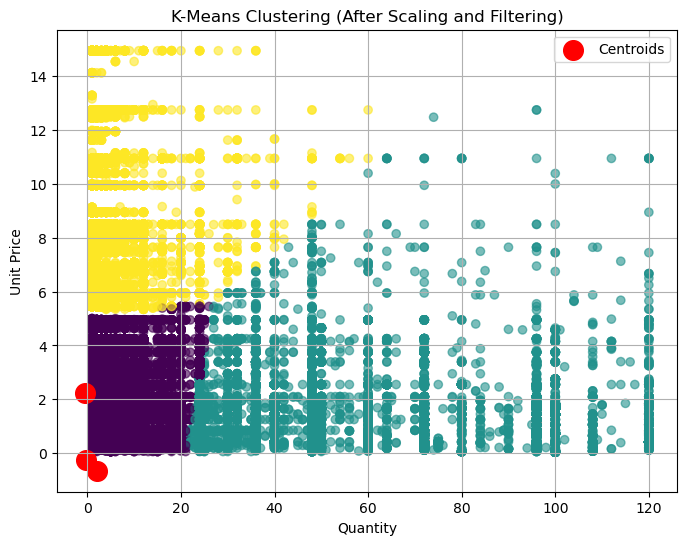

In [16]:
# Clustering Techniques
# Tasks:
# Apply clustering algorithms like K-Means and Hierarchical Clustering.
# Deliverables:
# Code demonstrating clustering and visualizations of clusters.
from sklearn.cluster import KMeans

X_clustering = data[['Quantity', 'UnitPrice']].fillna(0)

X_clustering = X_clustering[X_clustering['Quantity'] > 0]

quantity_threshold = np.percentile(X_clustering['Quantity'], 99)
unitprice_threshold = np.percentile(X_clustering['UnitPrice'], 99)

X_clustering = X_clustering[(X_clustering['Quantity'] <= quantity_threshold) & 
                             (X_clustering['UnitPrice'] <= unitprice_threshold)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

clusters_kmeans = kmeans.predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_clustering['Quantity'], X_clustering['UnitPrice'], c=clusters_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering (After Scaling and Filtering)')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.grid(True)
plt.show()


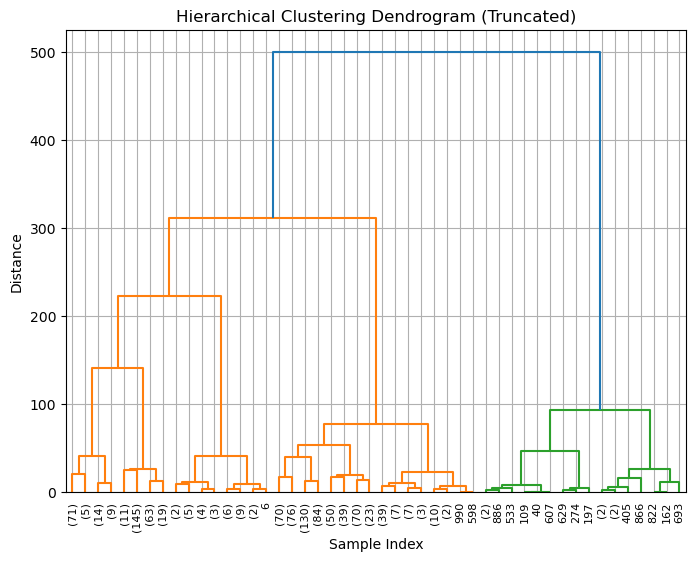

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Случайная выборка 1000 строк
X_clustering_sampled = X_clustering.sample(n=1000, random_state=42)
X_clustering_np = X_clustering_sampled.to_numpy()

linked = linkage(X_clustering_np, method='ward')

plt.figure(figsize=(8, 6))
dendrogram(linked,
           truncate_mode='level',
           p=5,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


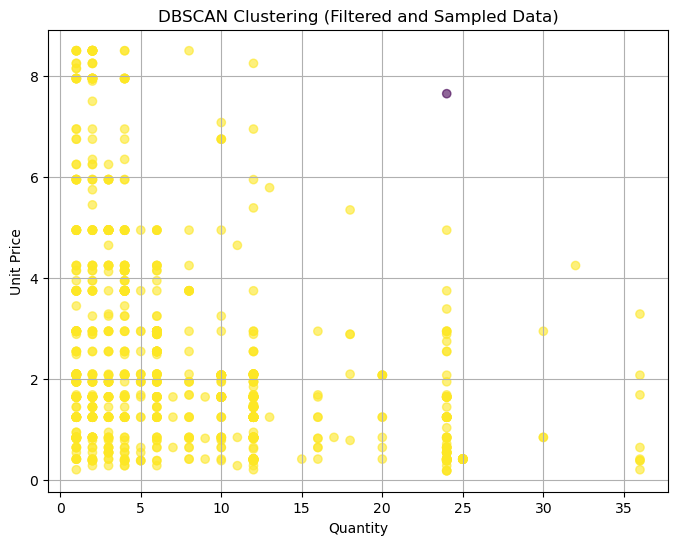

In [18]:
# Advanced Clustering Techniques
# Tasks:
# Implement advanced clustering methods like DBSCAN and Gaussian Mixture Models.
# Deliverables:
# Python scripts for advanced clustering techniques.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X_clustering = data[['Quantity', 'UnitPrice']].fillna(0)

quantity_threshold = np.percentile(X_clustering['Quantity'], 95)
unitprice_threshold = np.percentile(X_clustering['UnitPrice'], 95)

X_clustering_filtered = X_clustering[(X_clustering['Quantity'] <= quantity_threshold) & 
                                      (X_clustering['UnitPrice'] <= unitprice_threshold)]

# Шаг 2: Выборка 1000 строк
X_clustering_sampled = X_clustering_filtered.sample(n=1000, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering_sampled)

dbscan = DBSCAN(eps=1.0, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_clustering_sampled['Quantity'], X_clustering_sampled['UnitPrice'], c=clusters_dbscan, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (Filtered and Sampled Data)')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()


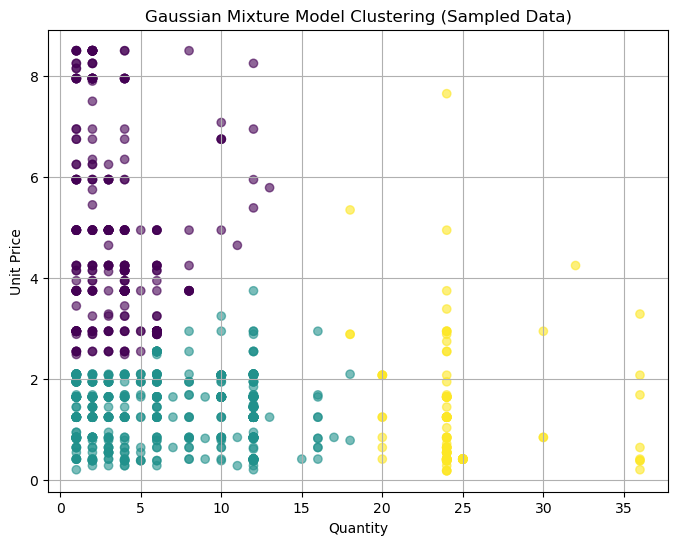

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled) 
clusters_gmm = gmm.predict(X_scaled)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_clustering_sampled['Quantity'], X_clustering_sampled['UnitPrice'], c=clusters_gmm, cmap='viridis', alpha=0.6)
plt.title('Gaussian Mixture Model Clustering (Sampled Data)')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()



Frequent Itemsets:
     support                                           itemsets
0      0.021                    (12 PENCIL SMALL TUBE WOODLAND)
1      0.026                         (3 STRIPEY MICE FELTCRAFT)
2      0.047                           (6 RIBBONS RUSTIC CHARM)
3      0.023                  (60 CAKE CASES VINTAGE CHRISTMAS)
4      0.027                      (60 TEATIME FAIRY CAKE CASES)
..       ...                                                ...
299    0.020  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...
300    0.020  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
301    0.022  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
302    0.022  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
303    0.020  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...

[304 rows x 2 columns]

Association Rules:
                              antecedents  \
18          (RED RETROSPOT CHARLOTTE BAG)   
19          (CHARLOTTE BAG PINK POLKADOT)   
23    (GARDENERS KNEELING PAD KEEP

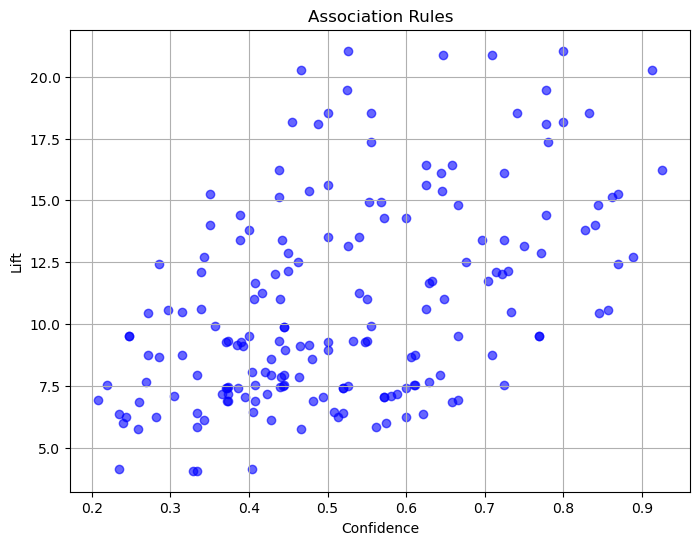

In [29]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

data_apriori = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack(fill_value=0)

data_apriori = data_apriori > 0

if len(data_apriori) > 1000:
    data_apriori = data_apriori.sample(n=1000, random_state=42)

frequent_itemsets['support'] = frequent_itemsets['support'].astype(float)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets))

rules = rules.sort_values('lift', ascending=False)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, c='blue')
plt.title('Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


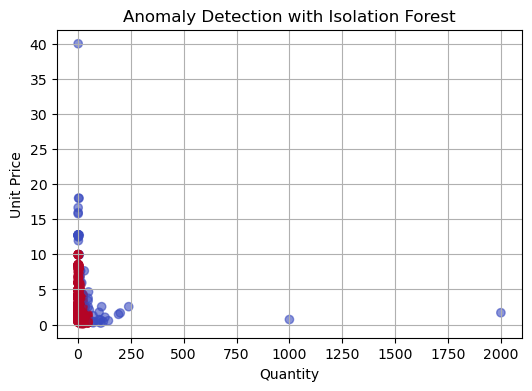

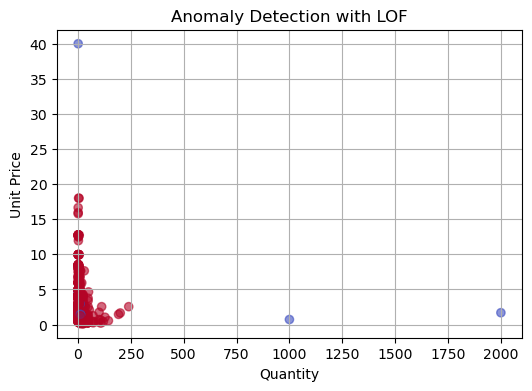


Isolation Forest Anomalies: 50
LOF Anomalies: 50


In [33]:
# Anomaly Detection
# Tasks:
# Implement anomaly detection techniques using Isolation Forest and LOF (Local Outlier Factor).
# Deliverables:
# Python scripts demonstrating anomaly detection.
# Import required libraries
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

if len(data) > 1000:
    data_anomaly = data.sample(n=1000, random_state=42)
else:
    data_anomaly = data.copy()

X_anomaly = data_anomaly[['Quantity', 'UnitPrice']].fillna(0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_anomaly)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest_labels = iso_forest.fit_predict(X_scaled)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)

data_anomaly['IsolationForest'] = iso_forest_labels
data_anomaly['LOF'] = lof_labels

plt.figure(figsize=(6, 4))
plt.scatter(
    X_anomaly['Quantity'], X_anomaly['UnitPrice'], 
    c=iso_forest_labels, cmap='coolwarm', alpha=0.6
)
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    X_anomaly['Quantity'], X_anomaly['UnitPrice'], 
    c=lof_labels, cmap='coolwarm', alpha=0.6
)
plt.title('Anomaly Detection with LOF')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

print("\nIsolation Forest Anomalies:", (iso_forest_labels == -1).sum())
print("LOF Anomalies:", (lof_labels == -1).sum())


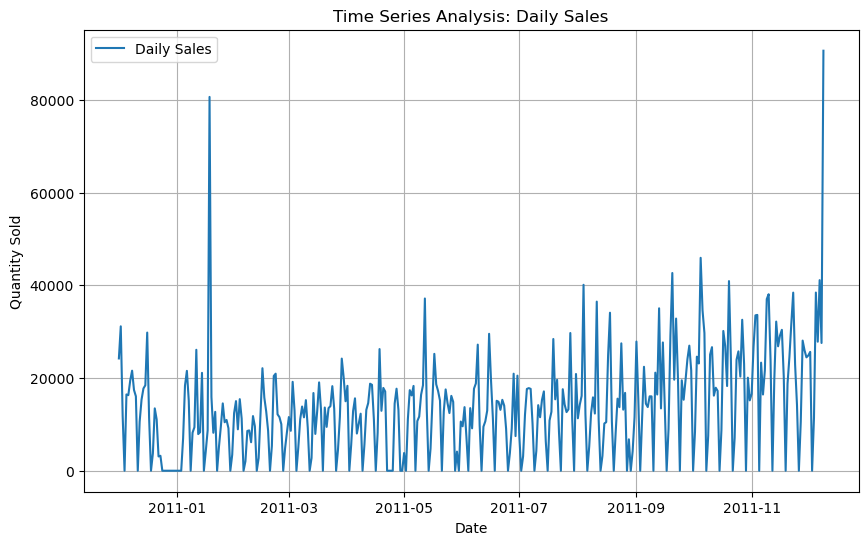

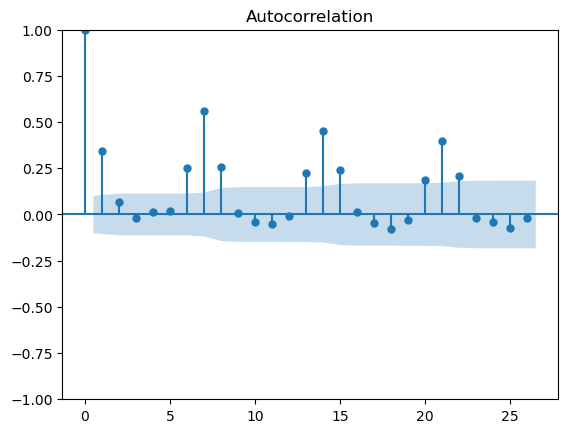

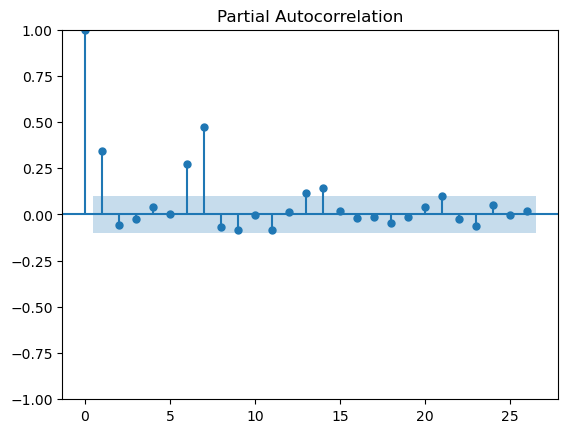

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  344
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3625.265
Date:                Thu, 21 Nov 2024   AIC                           7256.530
Time:                        18:46:19   BIC                           7268.043
Sample:                    12-01-2010   HQIC                          7261.116
                         - 11-09-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2608      0.060      4.357      0.000       0.143       0.378
ma.L1         -0.9726      0.014    -68.700      0.000      -1.000      -0.945
sigma2      8.819e+07   1.16e-10   7.58e+17      0.0

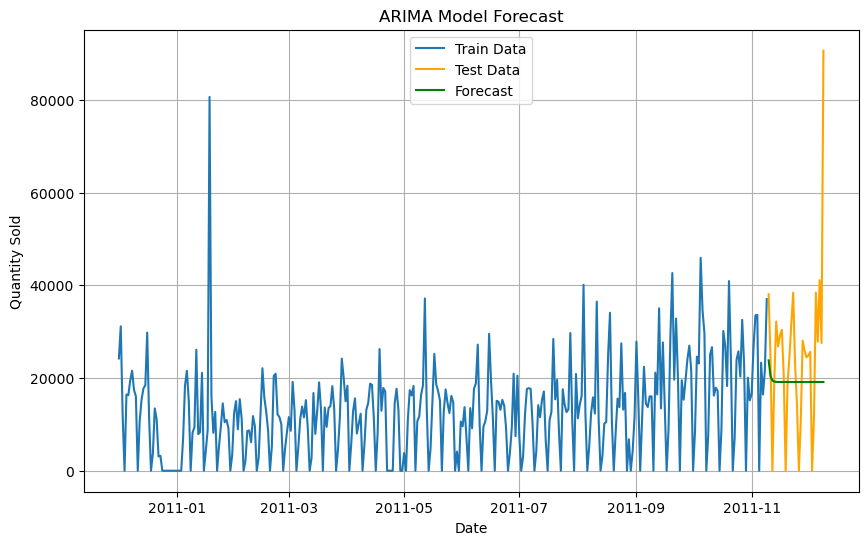

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

time_series_data = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()

full_date_range = pd.date_range(start=min(time_series_data.index), 
                                end=max(time_series_data.index), 
                                freq='D')

time_series_data = time_series_data.reindex(full_date_range, fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Daily Sales')
plt.title('Time Series Analysis: Daily Sales')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid()
plt.show()

plot_acf(time_series_data)
plt.show()

plot_pacf(time_series_data)
plt.show()

train_data = time_series_data[:-30] 
test_data = time_series_data[-30:] 

model = ARIMA(train_data, order=(1, 1, 1))
arima_result = model.fit()

print(arima_result.summary())

forecast = arima_result.forecast(steps=30)

forecast_index = pd.date_range(start=test_data.index[0], 
                               periods=len(forecast), 
                               freq='D')
forecast = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nurtasserikkanov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nurtasserikkanov/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


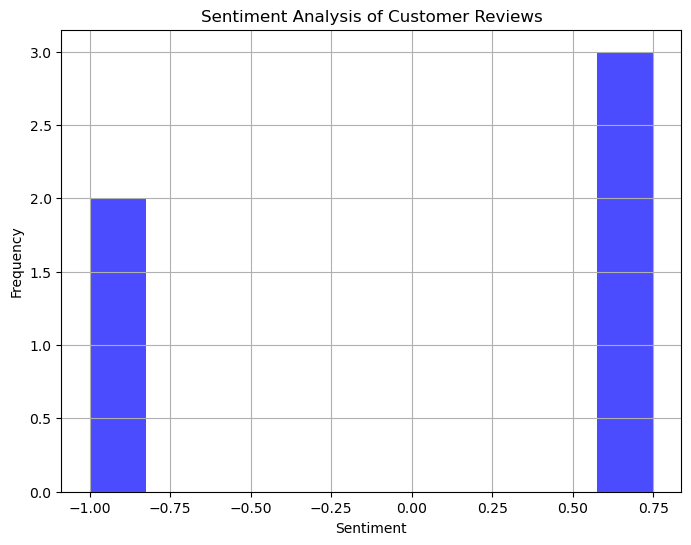

Processed Data:
                                              Review  \
0             The product is really good, I love it!   
1       Terrible experience, I will never buy again.   
2           Okay product, not the best but it works.   
3   Very satisfied with the service and the quality.   
4  Worst purchase I ever made, extremely disappoi...   

                                      Cleaned_Review  \
0               the product is really good i love it   
1         terrible experience i will never buy again   
2             okay product not the best but it works   
3    very satisfied with the service and the quality   
4  worst purchase i ever made extremely disappointed   

                                              Tokens  \
0      [the, product, is, really, good, i, love, it]   
1  [terrible, experience, i, will, never, buy, ag...   
2    [okay, product, not, the, best, but, it, works]   
3  [very, satisfied, with, the, service, and, the...   
4  [worst, purchase, i, ever, 

In [49]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import string
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Review': [
        "The product is really good, I love it!",
        "Terrible experience, I will never buy again.",
        "Okay product, not the best but it works.",
        "Very satisfied with the service and the quality.",
        "Worst purchase I ever made, extremely disappointed."
    ]
})

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

data['Cleaned_Review'] = data['Review'].apply(clean_text)

nltk.download('punkt')
data['Tokens'] = data['Cleaned_Review'].apply(word_tokenize)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['Tokens_No_Stopwords'] = data['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

stemmer = PorterStemmer()
data['Stemmed_Tokens'] = data['Tokens_No_Stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

data['Sentiment'] = data['Review'].apply(sentiment_analysis)

plt.figure(figsize=(8, 6))
plt.hist(data['Sentiment'], bins=10, color='blue', alpha=0.7)
plt.title('Sentiment Analysis of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Processed Data:")
print(data[['Review', 'Cleaned_Review', 'Tokens', 'Tokens_No_Stopwords', 'Stemmed_Tokens', 'Sentiment']])